# A notebook for plotting main results

These include:
1. Coding of individual behavioral regressors (e.g. feedback, value, target, etc.)
2. Coding of historycal outcomes
3. Distribution of coding (laminare, depth, etc.)
4. Maybe list of units with very strong coding (cherry picked examples)
5. Maybe try to find RPE according to the paper of Kennerley (2011 Double dissociation), or just see how many units do positive or negative coding of reward.

---
# Setup

In [1]:
# @title imports
import os

from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from popy.decoding.population_decoders import *
from popy.plotting.plotting_tools import plot_keypoints
import popy.config as cfg

In [2]:
# @title helper functions
def load_res(fname, target):
    floc = os.path.join(
        cfg.PROJECT_PATH_LOCAL,
        "notebooks",
        "decoders",
        "glm",
        "results",
        f"{fname}_target_{target}",
        "scores.nc",
    )
    print(f"loading {floc}")

    ds = xr.open_dataset(floc, engine="netcdf4")
    ds.close()
    return ds.copy("deep")


# plotting functions
def plot_summary_statistic(
    dss_original,
    plotting_func,
    title=None,
    p_lim=0.05,
    theme=None,
    n_extra_trials=(1, 0),
):
    dss = [ds.copy() for ds in dss_original]

    fig, axs = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)
    if not title is None:
        plt.suptitle(title)

    # colors = {'LPFC': 'tab:blue', 'MCC': 'grey'}
    # iterable tab colorsú
    if theme is None:
        colors = cm.get_cmap("tab10").colors
    elif theme == 1:
        colors = {"LPFC": "tab:blue", "MCC": "grey"}
        styles = ["-", "--", "-.", ":", ":"]
        styles = {ds.attrs["model_name"]: styles[i] for i, ds in enumerate(dss)}

    for m, monkey in enumerate(["ka", "po"]):
        for a, area in enumerate(["LPFC", "MCC"]):
            ax = axs[m, a]

            # get results of the two models for the current area and monkey
            for i_ds, ds in enumerate(dss):
                ds_curr = ds.sel(unit=(ds.monkey == monkey) & (ds.area == area))
                ax.plot(
                    ds.time.values,
                    plotting_func(ds_curr, p_lim=p_lim),
                    color=colors[area] if theme == 1 else colors[i_ds],
                    linestyle=styles[ds.attrs["model_name"]] if theme == 1 else "-",
                    lw=1,
                    label=f'{ds.attrs["model_name"]}, N={(~np.isnan(ds_curr["scores"])).sum("unit")[0].values}',
                )  # , linestyle=styles[ds.attrs["model_name"]])

            # legend below plot
            ax.legend(loc="upper right")

            # plot key points
            plot_keypoints(
                ax, n_extra_trials=n_extra_trials, fontsize=8, xlabels="both"
            )
            ax.grid(alpha=0.3)

            # set title and labels
            ax.set_title(f"monkey: {monkey}, area: {area}")
            ax.set_ylabel(f"prop. of significant units")
            ax.set_xlabel("time (s)")
            # hide spines
            ax.spines["right"].set_visible(False)
            ax.spines["top"].set_visible(False)

    plt.tight_layout()

    return fig, ax


# define summary statistic functions
def mean_scores(ds, p_lim=0.05):
    return np.nanmean(ds["scores"], axis=0)


def mean_scores_signif(ds, p_lim=0.05):
    ds = ds.where(ds["p_vals"] <= p_lim)
    return np.nanmean(ds["scores"], axis=0)


def prop_significants(ds, p_lim=0.05):
    n_non_nan_units = (~np.isnan(ds["scores"])).sum("unit")
    n_significant_units = (ds["p_vals"] <= p_lim).sum("unit")
    return n_significant_units / n_non_nan_units
    # return np.nanmean(ds['p_vals'] <= p_lim, axis=0)


def n_significants(ds, p_lim=0.05):
    n_significant_units = (ds["p_vals"] <= p_lim).sum("unit")
    return n_significant_units

---
# Result 1: Current outcome representation

loading /Users/zsombi/ZSOMBI/SBRI/PoPy/notebooks/decoders/glm/results/no_cmw_curr_fb_CPD_target_None/scores.nc
loading /Users/zsombi/ZSOMBI/SBRI/PoPy/notebooks/decoders/glm/results/cmw_curr_fb_CPD_target_None/scores.nc
loading /Users/zsombi/ZSOMBI/SBRI/PoPy/notebooks/decoders/glm/results/anova_feedback_target_None/scores.nc


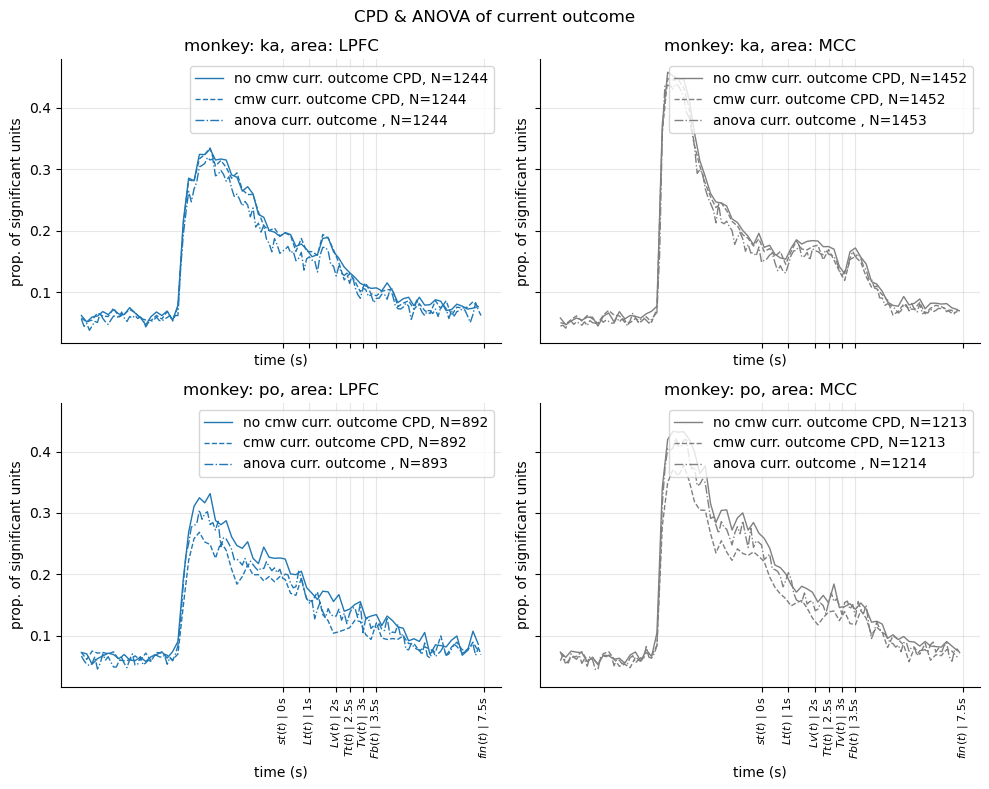

In [ ]:
p_lim = 0.05

# load data - 1-1 xarray datasets for all the conditions
fnames = {
    #'cmw current fb': 'cmw_curr_fb_CPD',
    "no cmw curr. outcome CPD": "no_cmw_curr_fb_CPD",
    "cmw curr. outcome CPD": "cmw_curr_fb_CPD",
    "anova curr. outcome ": "anova_feedback",
}

dss = []
for model_name, fname in fnames.items():
    ds = load_res(fname, target=None)
    # shift time dimension with -7.5s
    ds["time"] = ds["time"] - (
        7.5 + ds["time"].values[0]
    )  # shift time dimension with -7.5s if not like that already#
    ds.attrs["model_name"] = model_name
    dss.append(ds)

plotting_func = prop_significants  # prop_significants
plot_summary_statistic(
    dss, plotting_func, title=f"CPD & ANOVA of current outcome", p_lim=p_lim, theme=1
)
plt.show()

#   Feedback per target (Anova)

loading /Users/zsombi/ZSOMBI/SBRI/PoPy/notebooks/decoders/glm/results/anova_feedback_target_None/scores.nc
loading /Users/zsombi/ZSOMBI/SBRI/PoPy/notebooks/decoders/glm/results/anova_feedback_target_1/scores.nc
loading /Users/zsombi/ZSOMBI/SBRI/PoPy/notebooks/decoders/glm/results/anova_feedback_target_2/scores.nc
loading /Users/zsombi/ZSOMBI/SBRI/PoPy/notebooks/decoders/glm/results/anova_feedback_target_3/scores.nc
loading /Users/zsombi/ZSOMBI/SBRI/PoPy/notebooks/decoders/glm/results/anova_feedback_target_random/scores.nc


/var/folders/27/vz2x5s696jv_fnk5tpw5z1gw0000gn/T/ipykernel_35726/3416799582.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap("tab10").colors


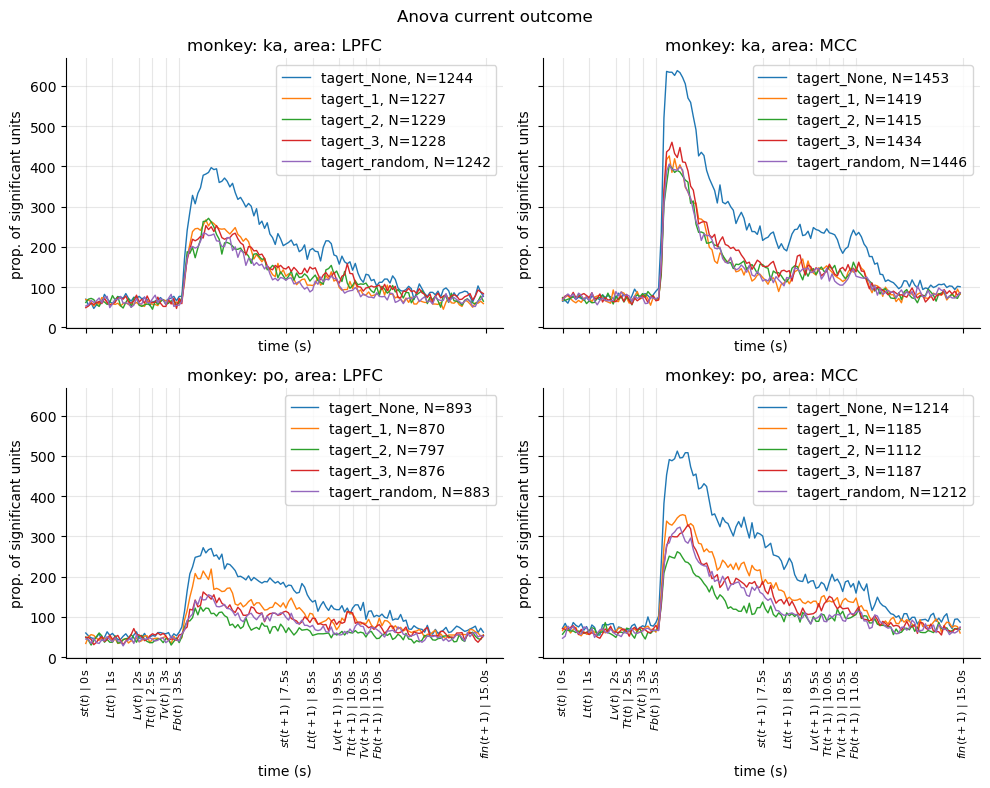

In [4]:
p_lim = 0.05

# load data - 1-1 xarray datasets for all the conditions
fnames = {
    "anova feedback": "anova_feedback",
}

dss = []
for target in [None, 1, 2, 3, "random"]:
    ds = load_res(fnames["anova feedback"], target=target)
    ds.attrs["model_name"] = f"tagert_{target}"
    dss.append(ds)

plotting_func = n_significants  # prop_significants
plot_summary_statistic(
    dss,
    plotting_func,
    title=f"Anova current outcome",
    p_lim=p_lim,
    theme=None,
    n_extra_trials=(0, 1),
)
plt.show()

In [5]:
ds_unit_info = []
for ds in dss:
  for t in ds.time.data:
    ds_temp = ds.sel(time=t)
    ids_signif = ds_temp['p_vals'] <= p_lim
    signif_units = ds_temp.unit.data[ids_signif]
    
    for monkey in ['ka', 'po']:
      for area in ['LPFC', 'MCC']:
        units_temp = np.array([unit for unit in signif_units if unit.split('_')[0] == monkey and unit.split('_')[2] == area])
        ds_unit_info.append({
          'time': t,
          'target': ds.attrs['target_of_interest'],
          'monkey': monkey,
          'area': area,
          'set_signif_units': set(units_temp),
          'n_significants': len(units_temp)
        })
          
ds_unit_info = pd.DataFrame(ds_unit_info).sort_values(['time', 'target', 'monkey', 'area'])
ds_unit_info.head(20)

,time,target,monkey,area,set_signif_units,n_significants
600,0.0,1,ka,LPFC,"{ka_170720_LPFC_08_01, ka_100920_LPFC_11_02, k...",69
601,0.0,1,ka,MCC,"{ka_170720_MCC_13_02, ka_230520_MCC_10_03, ka_...",67
602,0.0,1,po,LPFC,"{po_310822_LPFC_06_01, po_080722_LPFC_15_04, p...",34
603,0.0,1,po,MCC,"{po_210920_MCC_01_01, po_210920_MCC_12_01, po_...",66
1200,0.0,2,ka,LPFC,"{ka_180121_LPFC_11_02, ka_010922_LPFC_01_02, k...",62
1201,0.0,2,ka,MCC,"{ka_190821_MCC_08_01, ka_050820_MCC_14_01, ka_...",74
1202,0.0,2,po,LPFC,"{po_160920_LPFC_14_02, po_310822_LPFC_13_01, p...",50
1203,0.0,2,po,MCC,"{po_190321_MCC_02_04, po_270121_MCC_09_03, po_...",57
1800,0.0,3,ka,LPFC,"{ka_210722_LPFC_12_02, ka_250422_LPFC_12_01, k...",49
1801,0.0,3,ka,MCC,"{ka_100920_MCC_02_03, ka_030522_MCC_15_04, ka_...",71


In [6]:
def calculate_n_unis(ds_unit_info, monkey, area):
    """
    Calculate the number of units for different target conditions.

    Parameters:
    - ds_unit_info (DataFrame): The dataset containing unit information.
    - monkey (str): The monkey name.
    - area (str): The area name.

    Returns:
    - n_unis (DataFrame): The calculated number of units for each target condition.
    """

    n_unis = {}
    for t in ds_unit_info.time.unique():
        ds_unit_info_t = ds_unit_info[(ds_unit_info.time == t) & (ds_unit_info.monkey == monkey) & (ds_unit_info.area == area)]

        units_t1 = ds_unit_info_t[ds_unit_info_t.target == '1']['set_signif_units'].values[0]
        units_t2 = ds_unit_info_t[ds_unit_info_t.target == '2']['set_signif_units'].values[0]
        units_t3 = ds_unit_info_t[ds_unit_info_t.target == '3']['set_signif_units'].values[0]

        n_unis[t] = {
            '1 - (2+3)': len(set(units_t1) - (set(units_t2) | set(units_t3))),
            '2 - (1+3)': len(set(units_t2) - (set(units_t1) | set(units_t3))),
            '3 - (1+2)': len(set(units_t3) - (set(units_t1) | set(units_t2))),
            '1 & 2 & 3': len(set(units_t1) & set(units_t2) & set(units_t3)),
        }
    n_unis = pd.DataFrame(n_unis).T
    return n_unis

n_unis = calculate_n_unis(ds_unit_info, 'ka', 'LPFC')
n_unis

,1 - (2+3),2 - (1+3),3 - (1+2),1 & 2 & 3
0.0,59,55,40,0
0.1,65,69,51,0
0.2,54,64,55,0
0.3,50,64,53,0
0.4,56,48,54,0
...,...,...,...,...
14.5,47,55,63,0
14.6,56,51,72,0
14.7,52,53,81,0
14.8,59,68,78,0


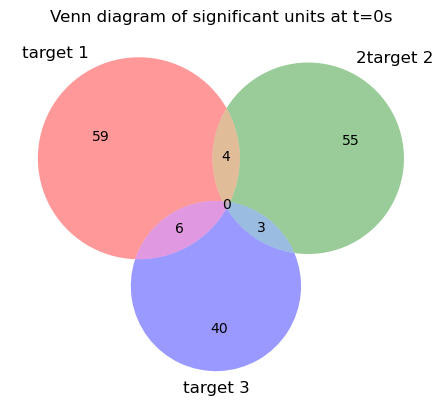

In [7]:
# show venn at t=4.5
from matplotlib_venn import venn3
from matplotlib_venn import venn2
t_of_interest = 0

ds_unit_info_t = ds_unit_info[ds_unit_info.time == t_of_interest]

units_t1 = ds_unit_info_t[ds_unit_info_t.target == '1']['set_signif_units'].values[0]
units_t2 = ds_unit_info_t[ds_unit_info_t.target == '2']['set_signif_units'].values[0]
units_t3 = ds_unit_info_t[ds_unit_info_t.target == '3']['set_signif_units'].values[0]

venn3([set(units_t1), set(units_t2), set(units_t3)], ('target 1', '2target 2', 'target 3'))
plt.title(f'Venn diagram of significant units at t={t_of_interest}s')
plt.show()


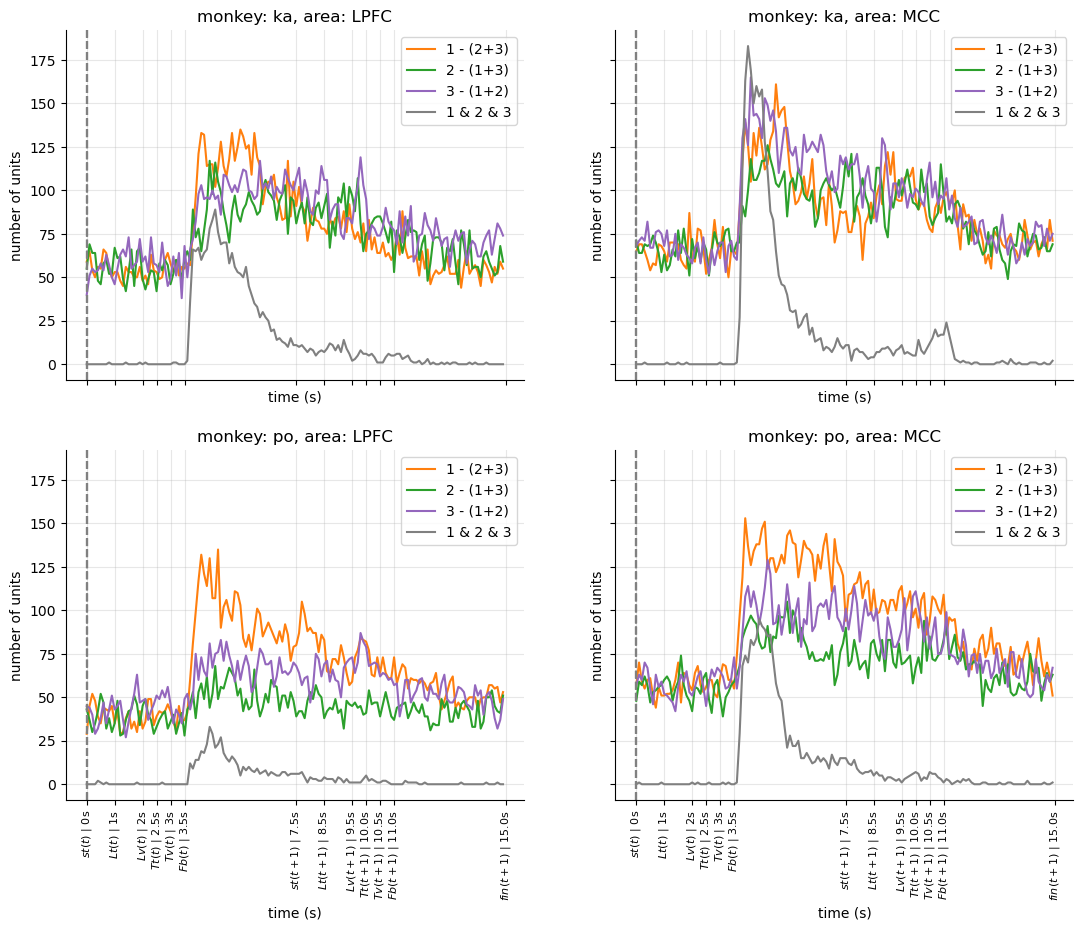

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(13, 10), sharex=True, sharey=True)

# colors are from the venn diagram
colors = ['tab:orange', 'tab:green', 'tab:purple', 'grey']

for m, monkey in enumerate(['ka', 'po']):
    for a, area in enumerate(['LPFC', 'MCC']):
        ax = axs[m, a]
        n_unis = calculate_n_unis(ds_unit_info, monkey, area)
        for c, col in enumerate(n_unis.columns):   
            ax.plot(n_unis.index, n_unis[col], label=col, color=colors[c])
    
            ax.legend()
            ax.set_xlabel('time (s)')
            ax.set_ylabel('number of units')
            plot_keypoints(ax, n_extra_trials=(0, 1), fontsize=8, xlabels='both')
            ax.grid(alpha=0.3)

            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)

            ax.set_title(f'monkey: {monkey}, area: {area}')

            # vertical line at 4s
            ax.axvline(t_of_interest, color='grey', linestyle='--')

plt.show()

In [9]:
t_of_interest = 4
ds_unit_info_t = ds_unit_info[ds_unit_info.time == t_of_interest]
print(f'Unit coding for target 1 only at time {t_of_interest}s: \n{set(ds_unit_info_t[ds_unit_info_t.target == "1"]["set_signif_units"].values[0]) - (set(ds_unit_info_t[ds_unit_info_t.target == "2"]["set_signif_units"].values[0]) | set(ds_unit_info_t[ds_unit_info_t.target == "3"]["set_signif_units"].values[0]))}')

Unit coding for target 1 only at time 4s: 
{'ka_080622_LPFC_08_02', 'ka_080622_LPFC_10_01', 'ka_300720_LPFC_13_02', 'ka_081020_LPFC_09_01', 'ka_280322_LPFC_05_03', 'ka_150622_LPFC_11_01', 'ka_230622_LPFC_10_02', 'ka_300720_LPFC_07_02', 'ka_081020_LPFC_02_02', 'ka_070322_LPFC_11_01', 'ka_250121_LPFC_05_01', 'ka_050422_LPFC_08_01', 'ka_020622_LPFC_14_01', 'ka_080822_LPFC_12_03', 'ka_290921_LPFC_12_01', 'ka_190821_LPFC_11_03', 'ka_100620_LPFC_13_01', 'ka_040321_LPFC_06_01', 'ka_041220_LPFC_06_01', 'ka_050620_LPFC_14_01', 'ka_070722_LPFC_10_01', 'ka_180321_LPFC_10_01', 'ka_130422_LPFC_15_01', 'ka_130622_LPFC_08_02', 'ka_090720_LPFC_02_01', 'ka_040321_LPFC_14_02', 'ka_300720_LPFC_03_01', 'ka_310820_LPFC_13_01', 'ka_090720_LPFC_08_01', 'ka_080822_LPFC_09_01', 'ka_230622_LPFC_05_01', 'ka_030522_LPFC_07_01', 'ka_240820_LPFC_15_03', 'ka_060922_LPFC_08_01', 'ka_010822_LPFC_09_01', 'ka_280622_LPFC_09_01', 'ka_180321_LPFC_06_01', 'ka_250121_LPFC_06_03', 'ka_100820_LPFC_10_01', 'ka_280622_LPFC_11_0

 # Target

loading /Users/zsombi/ZSOMBI/SBRI/PoPy/notebooks/decoders/glm/results/anova_target_target_None/scores.nc


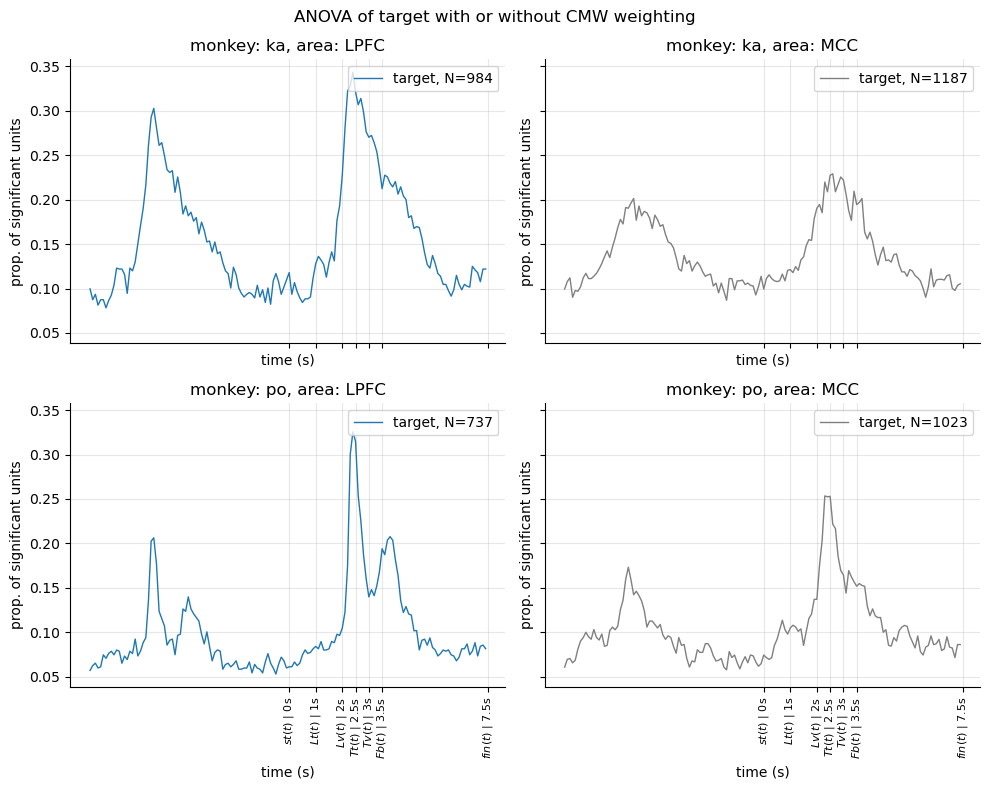

In [10]:
p_lim = 0.01

# load data - 1-1 xarray datasets for all the conditions
fnames = {
    #'cmw current fb': 'cmw_curr_fb_CPD',
    'target': 'anova_target',
    }

dss = []
for model_name, fname in fnames.items():
    ds = load_res(fname, target=None)
    # shift time dimension with -7.5s 
    ds['time'] = ds['time'] - (7.5 + ds['time'].values[0])  # shift time dimension with -7.5s if not like that already
    ds.attrs['model_name'] = model_name
    dss.append(ds)

plotting_func = prop_significants  # prop_significants
plot_summary_statistic(dss, plotting_func, title= f'ANOVA of target with or without CMW weighting', p_lim=p_lim, theme=1)
plt.show()

In [11]:
t = 2.5
x = dss[0].p_vals.sel(time=t)
units=set(x[x <= p_lim].unit.data)
# sort units
units = sorted(units, key=lambda x: int(x.split('_')[1]))
units

['ka_010720_LPFC_11_01',
 'ka_010720_MCC_11_03',
 'ka_010720_LPFC_06_02',
 'ka_010720_MCC_11_01',
 'ka_010720_LPFC_10_02',
 'ka_010720_MCC_12_01',
 'ka_010720_LPFC_06_03',
 'ka_010720_LPFC_06_01',
 'ka_010720_MCC_07_01',
 'ka_010720_LPFC_08_02',
 'ka_010720_MCC_04_01',
 'ka_010822_LPFC_15_01',
 'ka_010822_MCC_11_02',
 'ka_010822_MCC_09_01',
 'ka_010822_LPFC_10_02',
 'ka_010822_MCC_09_02',
 'ka_010822_MCC_13_02',
 'ka_010822_MCC_11_01',
 'ka_011020_MCC_09_01',
 'ka_011020_LPFC_02_01',
 'ka_011020_LPFC_10_02',
 'ka_011020_LPFC_10_01',
 'ka_011020_MCC_09_02',
 'ka_011020_LPFC_03_02',
 'ka_011020_LPFC_08_03',
 'ka_011020_MCC_07_01',
 'ka_011020_LPFC_09_03',
 'ka_011020_LPFC_09_02',
 'ka_020622_LPFC_13_03',
 'ka_020622_LPFC_15_01',
 'ka_020622_MCC_11_01',
 'ka_020622_LPFC_15_02',
 'ka_020622_LPFC_13_02',
 'ka_020622_LPFC_13_01',
 'ka_020622_MCC_16_02',
 'ka_020622_MCC_05_02',
 'ka_020622_LPFC_07_01',
 'ka_020622_LPFC_16_01',
 'ka_020622_MCC_15_01',
 'ka_020622_LPFC_14_03',
 'ka_020622_LPFC_

# Choice at switch

loading /Users/zsombi/ZSOMBI/SBRI/PoPy/notebooks/decoders/glm/results/anova_previous_choice_at_switch_target_None/scores.nc
loading /Users/zsombi/ZSOMBI/SBRI/PoPy/notebooks/decoders/glm/results/anova_upcoming_choice_at_switch_target_None/scores.nc


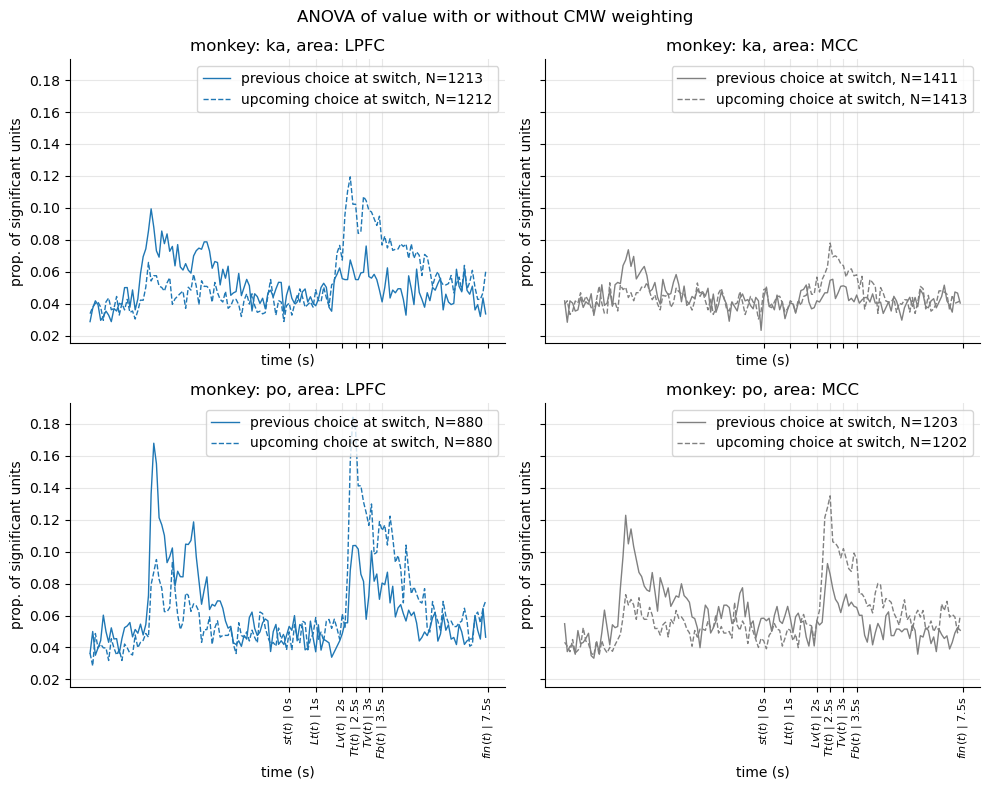

In [12]:
p_lim = 0.05

# load data - 1-1 xarray datasets for all the conditions
fnames = {
    'previous choice at switch': 'anova_previous_choice_at_switch',
    'upcoming choice at switch': 'anova_upcoming_choice_at_switch',
    }

dss = []
for model_name, fname in fnames.items():
    ds = load_res(fname, target=None)
    # shift time dimension with -7.5s 
    ds['time'] = ds['time'] # shift time dimension with -7.5s if not like that already
    ds.attrs['model_name'] = model_name
    dss.append(ds)

plotting_func = prop_significants  # prop_significants
plot_summary_statistic(dss, plotting_func, title= f'ANOVA of value with or without CMW weighting', p_lim=p_lim, theme=1)
plt.show()

 # Value


loading /Users/zsombi/ZSOMBI/SBRI/PoPy/notebooks/decoders/glm/results/anova_value_target_None/scores.nc


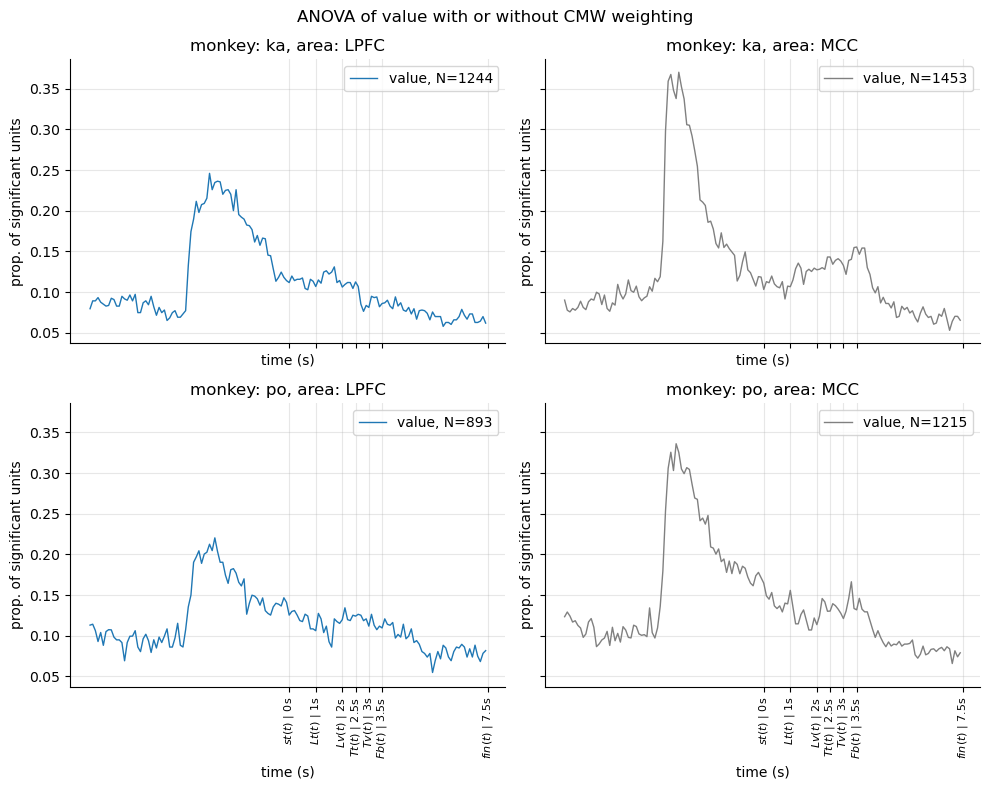

In [13]:
p_lim = 0.05

# load data - 1-1 xarray datasets for all the conditions
fnames = {
    #'cmw current fb': 'cmw_curr_fb_CPD',
    'value': 'anova_value',
    }

dss = []
for model_name, fname in fnames.items():
    ds = load_res(fname, target=None)
    # shift time dimension with -7.5s 
    ds['time'] = ds['time'] # shift time dimension with -7.5s if not like that already
    ds.attrs['model_name'] = model_name
    dss.append(ds)

plotting_func = prop_significants  # prop_significants
plot_summary_statistic(dss, plotting_func, title= f'ANOVA of value with or without CMW weighting', p_lim=p_lim, theme=1)
plt.show()